# Population Data from CSV

This notebooks reads sample population data from `data/atlantis.csv` and plots it using Matplotlib. Edit `data/atlantis.csv` and re-run this cell to see how the plots change!

# EBITDA ESPERADO MESES 08 A 12 DE 2024



In [43]:
# 1) Importar as bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 20)

# 2) Importar CSV
df = pd.read_csv('../data/contasAPagar.csv')


# 3) Transformar a coluna Vencimento em tipo Data e criar uma coluna referente ao mês da data
df["Vencimento"] = pd.to_datetime(df['Vencimento'], format='%d/%m/%Y')
df['month'] = df['Vencimento'].dt.to_period('M')


# 4) Transformar a string no R$ ### em um tipo inteiro
def convert_currency(value):
    value = value.replace('R$', '').replace('.', '').replace(',', '.').strip()
    return float(value)
df["Valor"] = df["Valor"].apply(convert_currency)


# 5) Agrupar o cutos por mês
custosMensal = df.groupby('month').agg({'Valor': 'sum'})
custosMensal = custosMensal.reset_index()

# 6) Atualizar nomes das colunas
custosMensal = custosMensal.rename(columns={'Valor': 'custos', 'month':'periodo'})

# Vou tratar a receita média dos últimos meses como uma constante nesse relatório
custosMensal['receita'] = 127000

# Vamos fazer a diferença entre a receita e os custos previstos
custosMensal['liquido'] = custosMensal['receita'] - custosMensal['custos']

custosMensal.to_csv("../output/custosMensal.csv",encoding='utf-8', index=False, header=True)

custosMensal


,periodo,custos,receita,liquido
0,2024-07,53953.24,127000,73046.76
1,2024-08,148382.32,127000,-21382.32
2,2024-09,136407.13,127000,-9407.13
3,2024-10,122971.42,127000,4028.58
4,2024-11,220162.89,127000,-93162.89
5,2024-12,116269.09,127000,10730.91


# "DESPESAS" ORDENADAS DE FORMA DESCENDENTE

In [56]:
pd.set_option('display.max_rows', 20)
df.sort_values(by='Valor', ascending=False)

df.groupby("Natureza de Operação").agg({"Valor": "sum"})

,Valor
Natureza de Operação,
AGUA,-349.90
ALUGUEL,-7000.00
ASSINATURA TV A CABO,-2289.54
CONSTRUÇÃO QUADRA DE BEACH TENNIS,-7295.52
CONTRIBUIÇÃO SINDICAL,-960.00
...,...
PORTARIA TERCERIZADA,-93500.00
SEGURO DE VIDA,-312.44
SERVIÇOS CONTABEIS,-8472.00


In [58]:

pd.set_option('display.max_rows', 1000)

df.groupby(by="Fornecedor").agg({'Valor': 'sum'}).sort_values(by="Valor")

# DESPESAS CUMULATIVAS

In [44]:
pd.set_option('display.max_rows', 20)


df = df.sort_values(by="Vencimento", ascending=True)
df["Valor"] = df["Valor"] * -1
df["cum"] = df.sort_values(by="Vencimento", ascending=True)["Valor"].cumsum()

df


,Vencimento,Fornecedor,Valor,Natureza de Operação,month,cum
58,2024-07-10,DAVID CARRER,-1412.00,SERVIÇOS CONTABEIS,2024-07,-1412.00
57,2024-07-10,COMERCIAL MENDONÇA,-1166.39,CONSTRUÇÃO QUADRA DE BEACH TENNIS,2024-07,-2578.39
56,2024-07-10,COMERCIAL MENDONÇA,-2152.43,CONSTRUÇÃO QUADRA DE BEACH TENNIS,2024-07,-4730.82
111,2024-07-20,LAÇO FORTE COMERCIO DE PRODUTOS AGRICOLAS LTDA ME,-892.06,CONSTRUÇÃO QUADRA DE BEACH TENNIS,2024-07,-5622.88
112,2024-07-20,W M TANNOUS LTDA,-1772.82,MATERIAIS DE LIMPEZA E HIGIENE,2024-07,-7395.70
...,...,...,...,...,...,...
148,2024-12-25,A DE PAULA MATERIAIS ELETRICOS LTDA,-5066.84,DESPESA COM MANUTENÇÃO,2024-12,-786224.50
156,2024-12-26,CPFL,-3000.00,ENERGIA,2024-12,-789224.50
187,2024-12-30,HG SERVICOS DE SEGURANCA,-8500.00,PORTARIA TERCERIZADA,2024-12,-797724.50
186,2024-12-30,"ASSOCIAÇÃO COMERCIAL, INDUSTRIAL DE ITUVERAVA",-40.00,OUTRAS DESPESAS,2024-12,-797764.50


# HISTÓRICO DE RECEITAS MESES 01 A 06 DE 2024

In [54]:

# 2) Importar CSV
dfReceitas = pd.read_csv('../data/recebimentos01a06.csv')


# 3) Transformar a coluna Vencimento em tipo Data e criar uma coluna referente ao mês da data
dfReceitas["Vencimento"] = pd.to_datetime(dfReceitas['Data do Recebimento'], format='%d/%m/%Y')
dfReceitas['month'] = dfReceitas['Vencimento'].dt.to_period('M')
dfReceitas['day'] = dfReceitas['Vencimento'].dt.to_period('d')


# 4) Transformar a string no R$ ### em um tipo inteiro
def convert_currency(value):
    value = value.replace('R$', '').replace('.', '').replace(',', '.').strip()
    return float(value)
dfReceitas["Valor"] = dfReceitas["Valor"].apply(convert_currency)


# 5) Agrupar o cutos por mês
groupedReceitasMensal = dfReceitas.groupby('month').agg({'Valor': 'sum'})
groupedReceitasMensal = groupedReceitasMensal.reset_index()

# 6) Atualizar nomes das colunas
groupedReceitasMensal = groupedReceitasMensal.rename(columns={'Valor': 'receita', 'month':'periodo'})


groupedReceitasMensal

,periodo,receita
0,2023-01,180.00
1,2023-02,310.00
2,2023-12,199.50
3,2024-01,78148.15
4,2024-02,137561.68
5,2024-03,128168.48
6,2024-04,174198.80
7,2024-05,140751.18
8,2024-06,122874.16
9,2024-07,41473.25


In [64]:
pd.set_option('display.max_rows', 20)


dfReceitas.groupby(by=["month","Descrição"]).agg({'Valor': 'sum'})

Valor
month   Descrição                               
2023-01 Importacao                        180.00
2023-02 Importacao                        310.00
2023-12 MENSALIDADE FAMILIAR 3            199.50
2024-01 DEPENDENTE PAGANTE                 85.50
        MENSALIDADE DEPENDENTE PAGANTE    128.25
...                                          ...
2024-07 MENSALIDADE FAMILIAR E2          1706.25
        MENSALIDADE INDIVIDUAL           1000.00
        MENSALIDADE PATRIMONIAL         17150.00
        MENSALIDADE TEMPORÁRIO            350.00
        MENSALIDADE USUÁRIO               350.00

[159 rows x 1 columns]

In [53]:
dfReceitasToCumulative = dfReceitas.drop(["Status do Débito", "Data do Recebimento", "Descrição"], axis=1)
dfDespesasToCumulative = df.drop(["Fornecedor","Natureza de Operação", "cum"], axis=1)


# GRÁFICO DE DISTRIBUIÇÃO DE RECEITAS NO MÊS DE JUNHO

In [46]:
receitasDF = dfReceitas.groupby(by=["Vencimento"]).agg({'Valor': 'sum'}).reset_index().sort_values(by="Vencimento")
receitasDF =  receitasDF[dfReceitasToCumulative['Vencimento'] > "2024-06-01" ]
receitasDF =  receitasDF.query('Vencimento >= "2024-06-01" and Vencimento <="2024-06-30"')

receitasDFCum = receitasDF
receitasDFCum["cum"] = receitasDF["Valor"].cumsum()
receitasDFCum["percent"] = (receitasDF["cum"] / receitasDFCum["Valor"].sum())*100

receitasDFCum

/tmp/ipykernel_2042/1219605406.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  receitasDF =  receitasDF[dfReceitasToCumulative['Vencimento'] > "2024-06-01" ]


,Vencimento,Valor,cum,percent
116,2024-06-03,4293.75,4293.75,3.494429
117,2024-06-04,3615.00,7908.75,6.436463
118,2024-06-05,6110.00,14018.75,11.409030
119,2024-06-06,6085.83,20104.58,16.361927
120,2024-06-07,5625.00,25729.58,20.939781
121,2024-06-10,20392.00,46121.58,37.535622
122,2024-06-11,8017.50,54139.08,44.060590
123,2024-06-12,1783.75,55922.83,45.512279
124,2024-06-13,2760.00,58682.83,47.758479
125,2024-06-14,2650.00,61332.83,49.915157


<Axes: xlabel='Vencimento'>

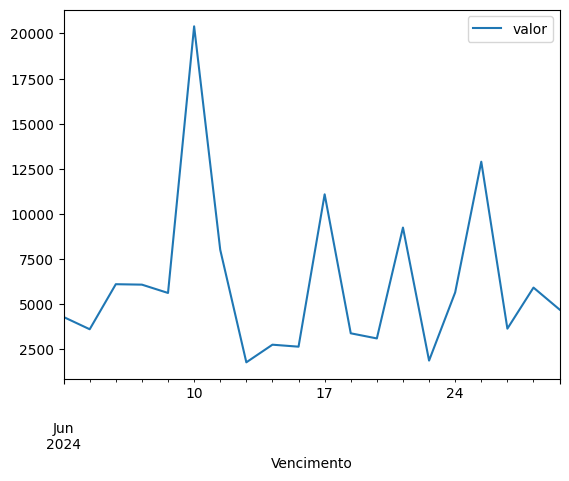

In [47]:
y = receitasDF["Valor"].to_numpy()
x = receitasDF["Vencimento"]

DF = pd.DataFrame({'valor': y}, index=x)

DF.plot(x_compat=False)

In [48]:

receitasDF = dfReceitas.groupby(by="day").agg({'Valor': 'sum'}).reset_index()

receitasDF =  dfReceitasToCumulative[dfReceitasToCumulative['day'] > "2024-07-01" ].sort_values(by="day")
y = receitasDF["Valor"].to_numpy()
x = receitasDF["day"]

receitasDF

,Valor,Vencimento,month,day
248,48.75,2024-07-02,2024-07,2024-07-02
249,100.00,2024-07-02,2024-07,2024-07-02
250,100.00,2024-07-02,2024-07,2024-07-02
251,230.00,2024-07-02,2024-07,2024-07-02
252,260.00,2024-07-02,2024-07,2024-07-02
...,...,...,...,...
1986,350.00,2024-07-18,2024-07,2024-07-18
2090,285.00,2024-07-19,2024-07,2024-07-19
2091,325.00,2024-07-19,2024-07,2024-07-19
2092,325.00,2024-07-19,2024-07,2024-07-19


In [50]:
pd.set_option('display.max_rows', 30)


receitasJunho = dfReceitas.query('Vencimento >= "2024-06-01" and Vencimento <="2024-06-30"').groupby(by=["Descrição"]).agg({'Valor': 'sum'}).reset_index().sort_values(by="Valor", ascending=False)
receitasJunho["Cum"] = dfReceitas.query('Vencimento >= "2024-06-01" and Vencimento <="2024-06-30"').groupby(by=["Descrição"]).agg({'Valor': 'sum'}).reset_index().sort_values(by="Valor", ascending=False)["Valor"].cumsum()
receitasJunho["percent"] = (receitasJunho["Cum"] / receitasJunho["Valor"].sum()) * 100

receitasJunho

,Descrição,Valor,Cum,percent
13,MENSALIDADE FAMILIAR,52862.50,52862.50,43.021657
19,MENSALIDADE PATRIMONIAL,20880.00,73742.50,60.014652
14,MENSALIDADE FAMILIAR 3,17539.50,91282.00,74.289012
15,MENSALIDADE FAMILIAR E2,11290.50,102572.50,83.477682
17,MENSALIDADE INDIVIDUAL,5200.00,107772.50,87.709654
11,MENSALIDADE ESTUDANTE,2250.00,110022.50,89.540795
20,MENSALIDADE TEMPORÁRIO,2100.00,112122.50,91.249861
9,MENSALIDADE DE ADESÃO,1650.00,113772.50,92.592698
12,MENSALIDADE ESTUDANTE 3,1600.00,115372.50,93.894843
22,MULTA DE RESCISÃO DE CONTRATO,1380.00,116752.50,95.017944


# GRÁFICO DE DISTRIBUIÇÃO DE DESPSAS NO MÊS DE JUNHO

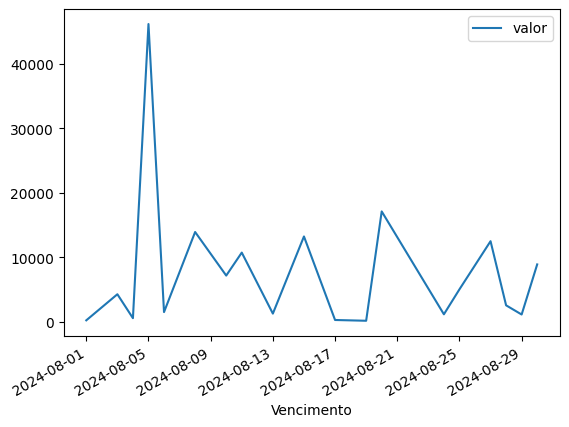

In [49]:
despesas_df = df.groupby(by="Vencimento").agg({'Valor': 'sum'}).reset_index().sort_values(by="Vencimento")
despesas_df["Valor"] =despesas_df["Valor"]*-1 
despesas_df =  despesas_df.query('Vencimento >= "2024-08-01" and Vencimento <="2024-08-30"')




y = despesas_df["Valor"].to_numpy()
x = despesas_df["Vencimento"]

DF = pd.DataFrame({'valor': y}, index=x)

DF.plot(x_compat=False)
plt.show()


In [51]:
despesas_df = df.groupby(by="Vencimento").agg({'Valor': 'sum'}).reset_index().sort_values(by="Vencimento")
despesas_df["Valor"] =despesas_df["Valor"]*-1 
despesas_df =  despesas_df.query('Vencimento >= "2024-07-01" and Vencimento <="2024-07-30"')


despesasCum = despesas_df
despesasCum["cum"] = despesas_df["Valor"].cumsum()
despesasCum["percent"] = (despesas_df["cum"] / despesasCum["Valor"].sum())*100

despesasCum

,Vencimento,Valor,cum,percent
0,2024-07-10,4730.82,4730.82,8.768371
1,2024-07-20,3295.68,8026.50,14.876771
2,2024-07-22,5948.30,13974.80,25.901688
3,2024-07-23,3000.00,16974.80,31.462059
4,2024-07-24,1200.00,18174.80,33.686207
5,2024-07-25,5481.69,23656.49,43.846282
6,2024-07-26,12239.39,35895.88,66.531463
7,2024-07-27,2635.66,38531.54,71.416545
8,2024-07-28,4157.77,42689.31,79.122792
9,2024-07-30,11263.93,53953.24,100.000000
